In [4]:
from src.models.llm_interface_2 import LLMInterface_2
from src.experiments.experiment_runner import run_full_experiment_multi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
conversation_history = (
    "We've been discussing literary styles and historical contexts in literature."
)
candidate_classes = [
    " Shakespeare.",
    " Mark Twain.",
    " Oscar Wilde.",
    " Charles Dickens.",
]
evidence_list = [
    " works that bring out the contemporary social conventions and mores of its time rather than"
    " focusing on poetic richness and dramatic performance."
]
class_elicitation = " My favourite author is"
evidence_elicitation = " I prefer reading"

In [6]:
llms = [
    LLMInterface_2(model_name="gpt2", backend="local"),
    LLMInterface_2(model_name="gpt2-medium", backend="local"),
    LLMInterface_2(model_name="gpt2-large", backend="local"),
    LLMInterface_2(model_name="gpt2-xl", backend="local"),
]

In [7]:
experiment_results = [
    run_full_experiment_multi(
        conversation_history,
        candidate_classes,
        evidence_list,
        class_elicitation,
        evidence_elicitation,
        llm,
) for llm in llms
]


--- Results for Pair:  Shakespeare. vs.  Mark Twain. ---
Prior probability for  Shakespeare.: 1.3845e-08
Prior probability for  Mark Twain.: 1.6406e-17
Prior ratio: 8.4388e+08
Likelihood for  Shakespeare.: 1.3290e-79
Likelihood for  Mark Twain.: 2.7874e-79
Likelihood ratio: 4.7677e-01
Posterior probability for  Shakespeare.: 3.4705e-08
Posterior probability for  Mark Twain.: 7.0357e-17
Posterior ratio: 4.9327e+08
Bayesian Consistency Error (BCE): 2.0378e-01

--- Results for Pair:  Shakespeare. vs.  Oscar Wilde. ---
Prior probability for  Shakespeare.: 1.3845e-08
Prior probability for  Oscar Wilde.: 3.1256e-17
Prior ratio: 4.4295e+08
Likelihood for  Shakespeare.: 1.3290e-79
Likelihood for  Oscar Wilde.: 7.6020e-80
Likelihood ratio: 1.7482e+00
Posterior probability for  Shakespeare.: 3.4705e-08
Posterior probability for  Oscar Wilde.: 1.7869e-16
Posterior ratio: 1.9421e+08
Bayesian Consistency Error (BCE): 1.3831e+00

--- Results for Pair:  Shakespeare. vs.  Charles Dickens. ---
Prior p

In [11]:
experiment_results

[{(' Shakespeare.',
   ' Mark Twain.',
   ' works that bring out the contemporary social conventions and mores of its time rather than focusing on poetic richness and dramatic performance.'): {'prior_c1': 1.3844960359972813e-08,
   'prior_c2': 1.6406387529321163e-17,
   'evidence_likelihood_c1': 1.3289578664382234e-79,
   'evidence_likelihood_c2': 2.787423610962704e-79,
   'posterior_c1': 3.470513250508106e-08,
   'posterior_c2': 7.035714107293355e-17,
   'BCE': 0.20377540588378906,
   'prompts': {'prior_prompt': "We've been discussing literary styles and historical contexts in literature. My favourite author is",
    'likelihood_prompt_c1': "We've been discussing literary styles and historical contexts in literature. My favourite author is Shakespeare. I prefer reading",
    'likelihood_prompt_c2': "We've been discussing literary styles and historical contexts in literature. My favourite author is Mark Twain. I prefer reading",
    'posterior_prompt': "We've been discussing literary s

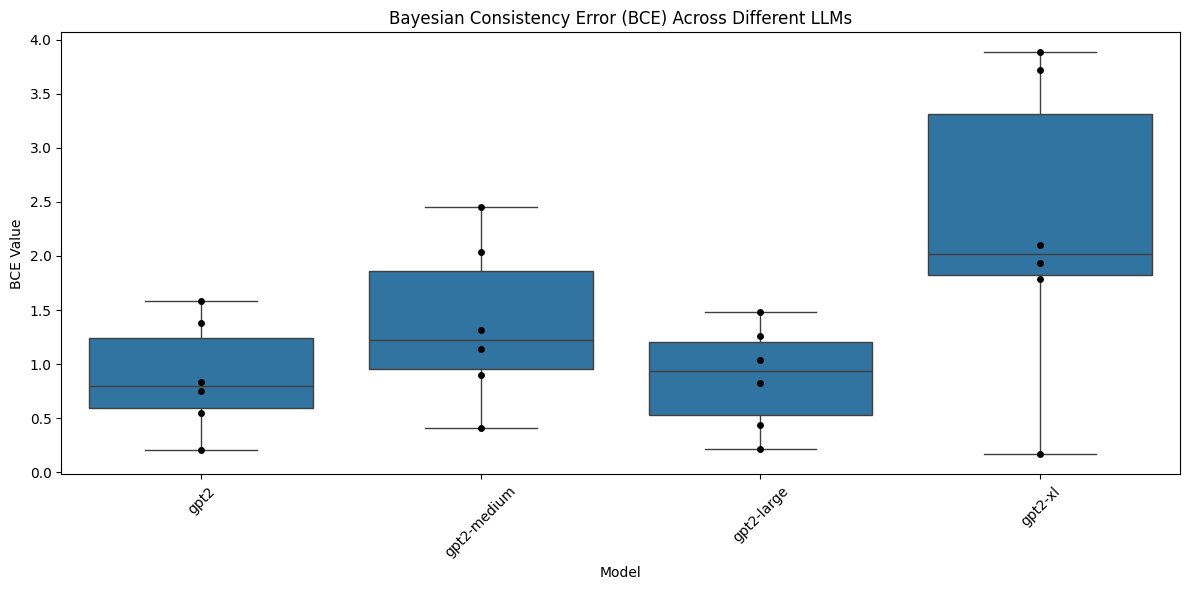


Summary Statistics:
                 mean       std       min       max
model                                              
gpt2         0.884746  0.517404  0.203775  1.586834
gpt2-large   0.876875  0.483794  0.216791  1.478474
gpt2-medium  1.375669  0.750060  0.412403  2.451706
gpt2-xl      2.262977  1.378041  0.166042  3.881859


In [22]:
all_results = []
for i, model_result in enumerate(experiment_results):
    model_name = llms[i].model_name  # Get the model name from the llms list
    
    # model_result is a dictionary where each key is a tuple (class1, class2, evidence)
    # and each value is a dictionary of metrics
    for pair_tuple, metrics in model_result.items():
        all_results.append({
            "model": model_name,
            "pair": f"{pair_tuple[0]} vs {pair_tuple[1]}",
            "evidence": pair_tuple[2],
            "BCE": metrics["BCE"]
        })

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(all_results)

plt.figure(figsize=(12, 6))
sns.boxplot(x="model", y="BCE", data=results_df)
plt.title("Bayesian Consistency Error (BCE) Across Different LLMs")
plt.xlabel("Model")
plt.ylabel("BCE Value")
plt.xticks(rotation=45)

# Add individual points for better visibility
sns.stripplot(x="model", y="BCE", data=results_df, color="black", alpha=1, jitter=False)

plt.tight_layout()
# plt.savefig("bce_comparison_boxplot.png")
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
summary = results_df.groupby("model")["BCE"].agg(["mean", "std", "min", "max"])
print(summary)

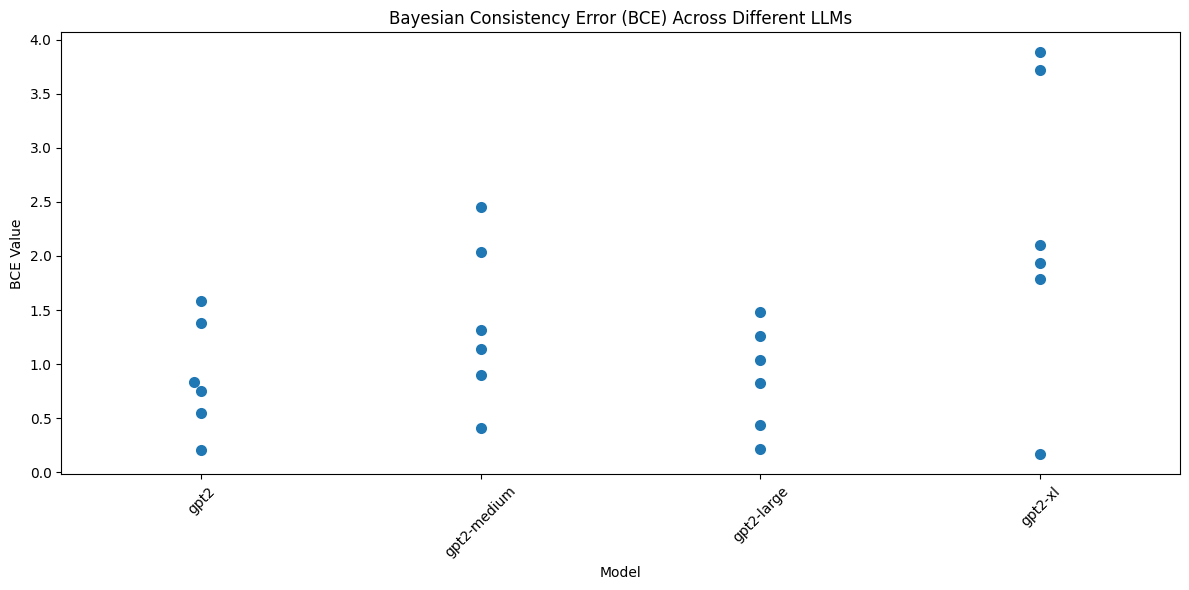

In [17]:
# Create swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x="model", y="BCE", data=results_df, size=8)
plt.title("Bayesian Consistency Error (BCE) Across Different LLMs")
plt.xlabel("Model")
plt.ylabel("BCE Value")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("bce_comparison_swarmplot.png")
plt.show()